In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Leitura

In [19]:
exp_inflacao = pd.read_csv(r"bases/q1/expectativa_inflacao.csv", sep=";")
demanda_agg = pd.read_csv(r"bases/q1/pib_demanda.csv", sep=";")
hiato = pd.read_excel(r"bases/q1/hiato_produto.xlsx", header=1)
pib_tendencia = pd.read_excel(r"bases/q1/pib_tendencia.xls")

# 2. Ajustes

## 2.1 Expectativa de Inflação

In [20]:
exp_inflacao = exp_inflacao.rename(
    columns={
        exp_inflacao.columns[0]: "data",
        exp_inflacao.columns[1]: "valor"
        }
    )

exp_inflacao = exp_inflacao.drop(exp_inflacao.columns[-1], axis=1)
exp_inflacao.head()

,data,valor
0,2001.07,"6,4"
1,2001.08,"6,57"
2,2001.09,"6,53"
3,2001.10,"6,49"
4,2001.11,"5,57"


In [21]:
# Mudando tipo de str para float
exp_inflacao['valor'] = exp_inflacao['valor'].str.replace(',','.').astype(float)

exp_inflacao['ano'] = exp_inflacao['data'].astype(str).str[:4]
exp_inflacao = exp_inflacao.groupby('ano')['valor'].mean().reset_index()

exp_inflacao.head()

,ano,valor
0,2001,6.066667
1,2002,6.637500
2,2003,7.860000
3,2004,6.055833
4,2005,5.108333


## 2.2 Demanda Agregada

In [22]:
demanda_agg = demanda_agg.rename(
    columns={
        demanda_agg.columns[0]: "data",
        demanda_agg.columns[1]: "valor"
        }
    )

demanda_agg = demanda_agg.drop(demanda_agg.columns[-1], axis=1)
demanda_agg.head()

,data,valor
0,1996 T1,"99,4010532039616"
1,1996 T2,"100,659967899523"
2,1996 T3,"104,152144939342"
3,1996 T4,"103,379016138129"
4,1997 T1,"104,42029256645"


In [23]:
# Mudando tipo de str para float
demanda_agg['valor'] = demanda_agg['valor'].str.replace(',','.').astype(float)

demanda_agg['ano'] = demanda_agg['data'].astype(str).str[:4]
demanda_agg = demanda_agg.groupby('ano')['valor'].mean().reset_index()

demanda_agg.head()

,ano,valor
0,1996,101.898046
1,1997,105.694846
2,1998,106.071467
3,1999,106.567923
4,2000,111.163838


## 2.3 Hiato

In [24]:
hiato = hiato[["Unnamed: 0", "Hiato"]]
hiato.rename(columns={"Unnamed: 0": "data", "Hiato": "valor"}, inplace=True)
hiato.head()

,data,valor
0,1970Q1,0.047463
1,1970Q2,0.036750
2,1970Q3,0.021566
3,1970Q4,-0.007672
4,1971Q1,0.010571


In [25]:
hiato['data'] = hiato['data'].str[:4]
hiato_anual = hiato.groupby('data')['valor'].mean().reset_index()

hiato_anual.head()

,data,valor
0,1970,0.024527
1,1971,0.008058
2,1972,0.011776
3,1973,0.047126
4,1974,0.028379


# 3. Gráfico

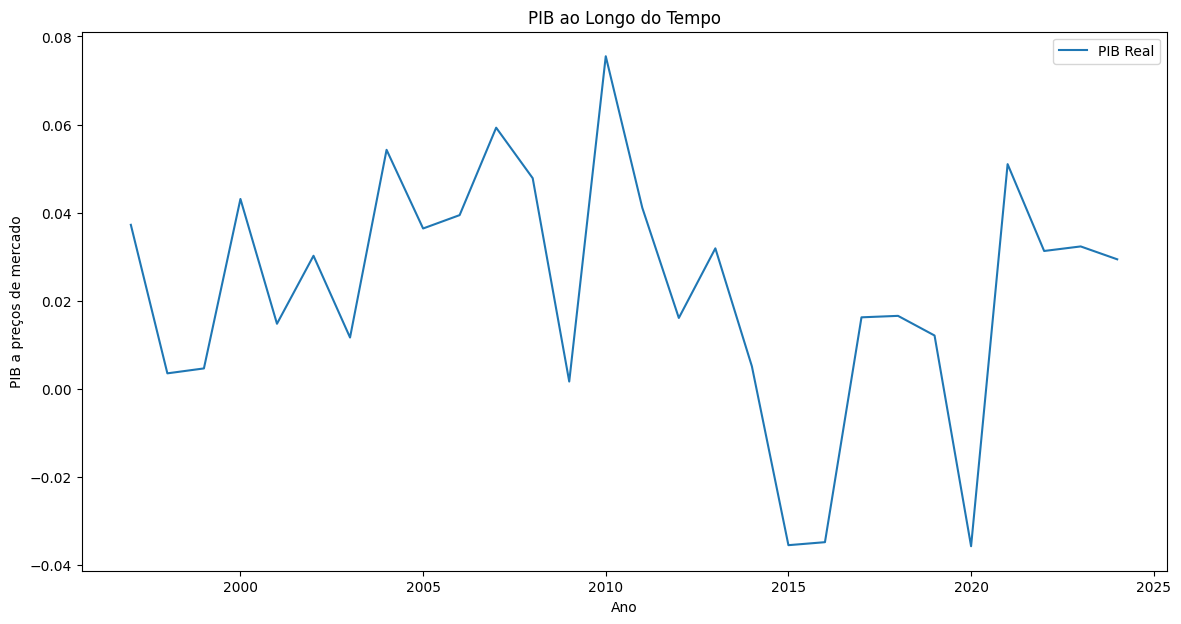

In [26]:
demanda_agg.ano = demanda_agg.ano.astype(int)
pib = demanda_agg
pib.valor = pib.valor.pct_change()
# Visualização do PIB e PIB Potencial
plt.figure(figsize=(14, 7))
plt.plot(pib['ano'], pib['valor'], label='PIB Real')
plt.title('PIB ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('PIB a preços de mercado')
plt.legend()
plt.show()

In [27]:
hiato_anual.data = hiato_anual.data.astype(int)
hiato_anual = hiato_anual[hiato_anual["data"] >= 2001]

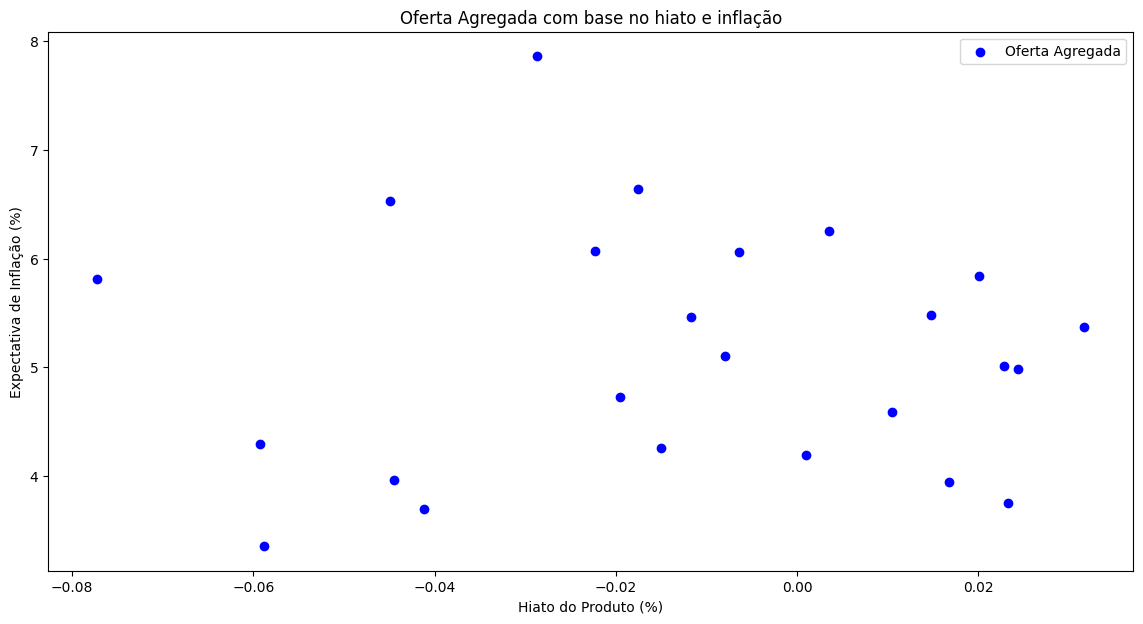

In [28]:
exp_inflacao.ano = exp_inflacao.ano.astype(int)
exp_inflacao = exp_inflacao[exp_inflacao["ano"] <= 2024]

plt.figure(figsize=(14, 7))
plt.scatter(hiato_anual['valor'], exp_inflacao['valor'], c='blue', label='Oferta Agregada')
plt.title('Oferta Agregada com base no hiato e inflação')
plt.xlabel('Hiato do Produto (%)')
plt.ylabel('Expectativa de Inflação (%)')
plt.legend()
plt.show()

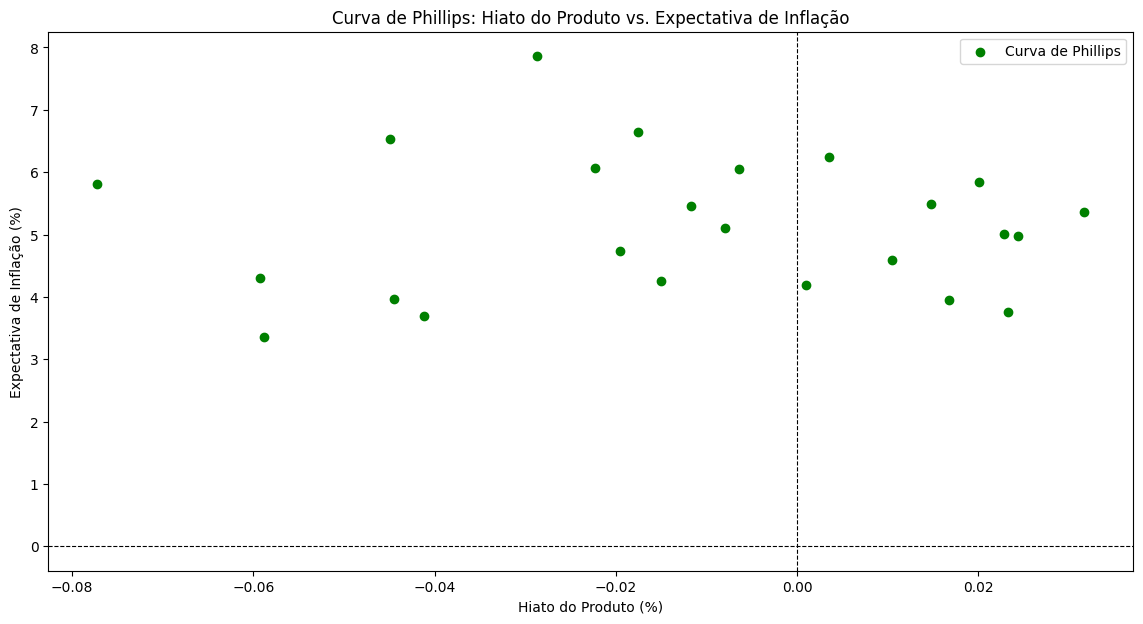

In [29]:
plt.figure(figsize=(14, 7))
plt.scatter(hiato_anual['valor'], exp_inflacao['valor'], c='green', label='Curva de Phillips')
plt.title('Curva de Phillips: Hiato do Produto vs. Expectativa de Inflação')
plt.xlabel('Hiato do Produto (%)')
plt.ylabel('Expectativa de Inflação (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

# 3.1 Gráfico de Tendência do PIB

In [30]:
pib_tendencia = pib_tendencia.iloc[56:]

In [31]:
pib_tendencia

,Data,PIB,LOG,Tendência
56,2010 T1,156.975238,5.056088,5.054328
57,2010 T2,158.940352,5.068529,5.063873
58,2010 T3,160.346598,5.077338,5.073076
59,2010 T4,162.545412,5.090957,5.081875
60,2011 T1,164.919448,5.105457,5.090212
61,2011 T2,166.386172,5.114311,5.098034
62,2011 T3,166.112027,5.112662,5.105298
63,2011 T4,167.662732,5.121954,5.111970
64,2012 T1,165.339449,5.108001,5.118022
65,2012 T2,168.167085,5.124958,5.123432


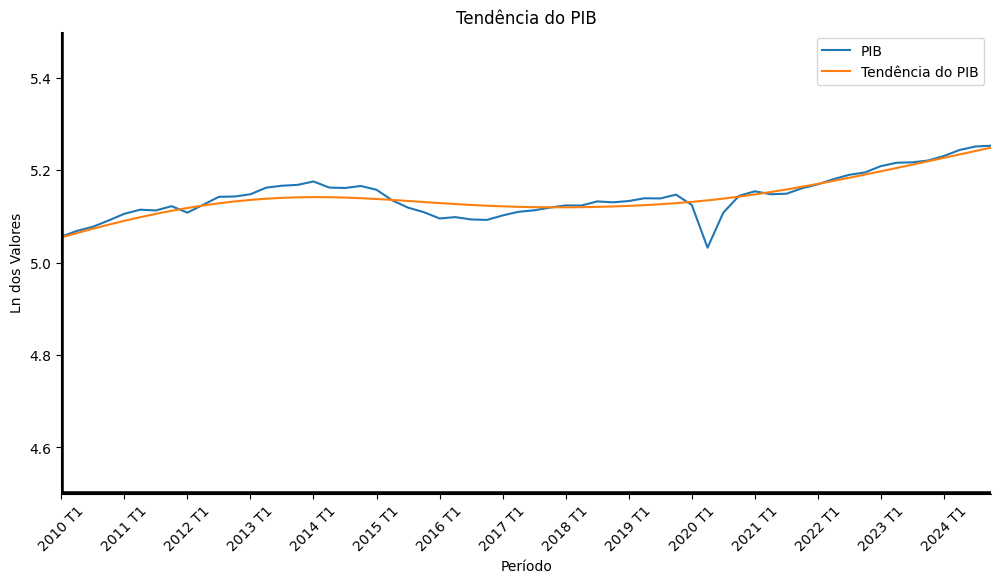

In [32]:
plt.figure(figsize=(12, 6))


sns.lineplot(x='Data', y='LOG', data=pib_tendencia, label='PIB')
sns.lineplot(x='Data', y='Tendência', data=pib_tendencia, label='Tendência do PIB')


plt.title('Tendência do PIB')
plt.xlabel('Período')
plt.ylabel('Ln dos Valores')

plt.ylim(4.5, 5.5)
plt.xlim("2010 T1", "2024 T4")

plt.xticks(rotation=45)

plt.axhline(y=4.5, color='black', linewidth=4)
plt.axvline(x="2010 T1",color='black', linewidth=4)


plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

xticks = plt.gca().get_xticks()
xticklabels = plt.gca().get_xticklabels()

plt.gca().set_xticks([xticks[i] for i in range(0, len(xticks), 4)])
plt.gca().set_xticklabels([xticklabels[i].get_text() for i in range(0, len(xticklabels), 4)])

plt.grid(False)
